In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns



- 0: 진짜뉴스, 1: 가짜 뉴스

In [2]:
train = pd.read_csv('news_train.csv')
train.head()

,n_id,date,title,content,ord,info
0,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,[이데일리 MARKETPOINT]15:32 현재 코스닥 기관 678억 순매도,1,0
1,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,"""실적기반"" 저가에 매집해야 할 8월 급등유망주 TOP 5 전격공개",2,1
2,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,"하이스탁론, 선취수수료 없는 월 0.4% 최저금리 상품 출시",3,1
3,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,종합 경제정보 미디어 이데일리 - 무단전재 & 재배포 금지,4,0
4,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참",전국적인 소비 붐 조성에 기여할 예정,1,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118745 entries, 0 to 118744
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   n_id     118745 non-null  object
 1   date     118745 non-null  int64 
 2   title    118745 non-null  object
 3   content  118745 non-null  object
 4   ord      118745 non-null  int64 
 5   info     118745 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 5.4+ MB


In [6]:
print("진짜 뉴스 개수: {}".format(len(train.loc[train['info']==0])))
print("가짜 뉴스 개수: {}".format(len(train.loc[train['info']==1])))

진짜 뉴스 개수: 71813
가짜 뉴스 개수: 46932


**뉴스 헤드라인 확인하기**

In [12]:
train['content'].head()

0    [이데일리 MARKETPOINT]15:32 현재 코스닥 기관 678억 순매도
1         "실적기반" 저가에 매집해야 할 8월 급등유망주 TOP 5 전격공개
2             하이스탁론, 선취수수료 없는 월 0.4% 최저금리 상품 출시
3              종합 경제정보 미디어 이데일리 - 무단전재 & 재배포 금지
4                          전국적인 소비 붐 조성에 기여할 예정
Name: content, dtype: object

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


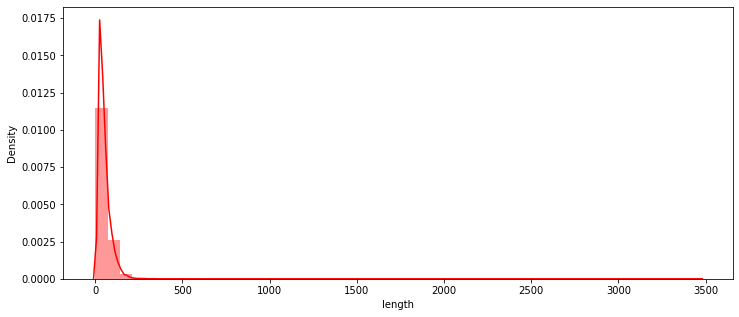

In [13]:
# 뉴스 헤드라인 길이

train['length'] = train['content'].apply(lambda x: len(x))
plt.figure(figsize=(12,5))
sns.distplot(train['length'],color='r')

대부분 뉴스 헤드라인의 길이는 0~250자에 분포되어 있다

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


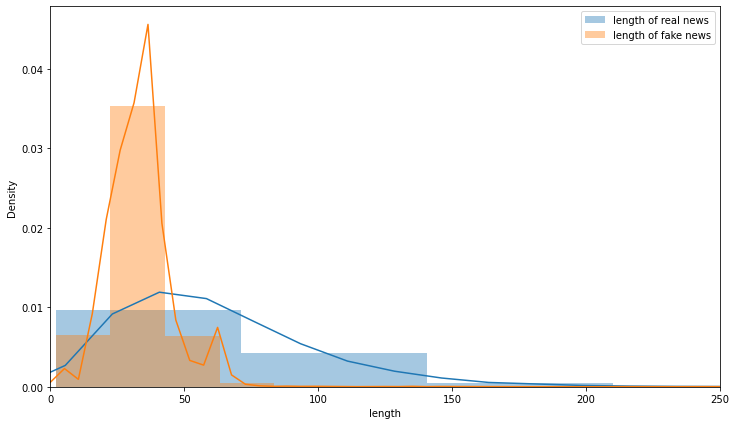

In [15]:
plt.figure(figsize=(12,7))
fake = train.loc[train['info']==1]
real = train.loc[train['info']==0]
sns.distplot(fake['length'],label = 'length of fake news')
sns.distplot(real['length'],label = 'length of real news')
plt.xlim(0,250)
plt.legend()

진짜, 가짜 뉴스 텍스트의 길이 분포도를 보면 가짜 뉴스는 0-50자 사이에 치우쳐있는 반면, 진짜뉴스는 0-150에 골고루 분포되어있다

가짜 뉴스는 짧은 스팸성 내용이들어있다고 추측할 수 있다

In [17]:
fake['length'].describe()

count    46932.000000
mean        34.470702
std         20.383651
min          2.000000
25%         27.000000
50%         34.000000
75%         39.000000
max       1022.000000
Name: length, dtype: float64

In [16]:
real['length'].describe()

count    71813.000000
mean        62.342891
std         43.596060
min          2.000000
25%         34.000000
50%         55.000000
75%         82.000000
max       3469.000000
Name: length, dtype: float64

In [ ]:
# ord 의 가짜진짜 뉴스 분포 정도
# 가짜 뉴스에 대한 wordcloud 에 따라 해당 top 단어 들이 있는 컬럼을 fake뉴스로 예측.

AutoML 
https://dacon.io/competitions/official/235658/codeshare/1843?page=1&dtype=recent&ptype=pub
PB 0.94

자연어 처리 과정
1. Preprocessing
: 불용어 제거(Stopwords removing), 형태소 분석(Stemming), 표제어 추출(Lemmatization)


2. Vectorization
: One-hot Encoding, Count vectorization, Tfidf, Padding


3. Embedding
: Word2vec, Doc2vec, Glove, Fasttext


4. Modeling
: GRU, LSTM, Attention


위의 과정을 이번 신문기사 분류 문제에 적용해보면 다음과 같습니다.

1. 우선 데이터를 불러온 후 기사의 각 문장별로 Konlpy의 함수 중 하나를 활용하여 형태소 분석을 진행합니다.
2. 그 후 필요없는 단어들을 불용어로 지정하고 제외합니다.
3. 해당 결과를 sklearn 패키지의 함수 중 하나를 이용하여 정수 인코딩으로 변환해주는 Vectorization을 진행합니다.
4. 각 문장별로 벡터화된 문장들은 서로 다른 길이를 갖게 됩니다. 모델에 입력하기 위해 모든 문장 벡터들은 일정한 길이를 가져야 하므로 길이가 긴 문장을 자르고 길이가 짧은 문장은 0으로 채워넣습니다.(Padding)
5. 앞서 처리된 문장 벡터들을 특정 차원으로 임베딩 시킵니다. 딥러닝 모델을 이용할 시 자동으로 임베딩을 진행해주는 층을 추가하면 간단하게 진행이 됩니다. 성능을 높이기 위해서 pre-trained embedding인 word2vec, glove 등을 이용합니다.
6. 훈련을 시키고 테스트를 진행합니다.

### 1. Preprocessing -  형태소 분석, 불용어 제거

In [22]:
!set -x \
&& pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

+ pip install konlpy
     |████████████████████████████████| 19.4MB 1.4MB/s 
     |████████████████████████████████| 92kB 10.1MB/s 
     |████████████████████████████████| 460kB 29.9MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
+ bash -x
+ curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh
+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ echo 'Installing automake (A dependency for mecab-ko)'
Installing automake (A dependency for mecab-ko)
+ install_automake
+ '[' Linux == Linux ']'
++ grep -Ei 'debian|buntu|mint' /etc/lsb

In [33]:
from konlpy.tag import Mecab
import re

stopwords = ['을', '를', '이', '가', '은','는','null'] #불용어 설정
tokenizer = Mecab()
token_list = []

for text in train['content']:
  txt = re.sub('[^가-힣a-zA-Z]', ' ', text) #한글,영어 남기고 나머지 모두 제거
  token = tokenizer.morphs(txt)
  token = [t for t in token if t not in stopwords or type(t) != float] #형태소 분석 결과 중 stopwords에 해당하지 않는 것만 추출
  token_list.append(token)


In [35]:
token_list[:5]

[['이', '데일리', 'MARKETPOINT', '현재', '코스닥', '기관', '억', '순매도'],
 ['실적', '기반', '저가', '에', '매집', '해야', '할', '월', '급등', '유망주', 'TOP', '전격', '공개'],
 ['하이스', '탁론', '선취', '수수료', '없', '는', '월', '최저', '금리', '상품', '출시'],
 ['종합', '경제', '정보', '미디어', '이', '데', '일리', '무단', '전재', '재', '배포', '금지'],
 ['전국', '적', '인', '소비', '붐', '조성', '에', '기여', '할', '예정']]

### 2. Vectorization 

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df=0)
tfidf_vectorizer = tfidf.fit_transform(tokens) 

#tf-idf dictionary    
tfidf_dict = tfidf.get_feature_names()
print(tfidf_dict)
print(tfidf_vectorizer.toarray())

NameError: ignored